In [ ]:
def reward_function(params):
   
    
    # Read input parameters
    track_width = params['track_width']
    distance_from_center = params['distance_from_center']
    all_wheels_on_track = params['all_wheels_on_track']
    speed = params['speed']
    waypoints = params['waypoints']
    closest_waypoints = params['closest_waypoints']
    heading = params['heading']

    
    marker_1 = 0.1 * track_width
    marker_2 = 0.25 * track_width
    marker_3 = 0.5 * track_width
    SPEED_THRESHOLD = 1.0 
    next_point = waypoints[closest_waypoints[1]]
    prev_point = waypoints[closest_waypoints[0]]
    DIRECTION_THRESHOLD = 10.0

    
    track_direction = math.atan2(next_point[1] - prev_point[1], next_point[0] - prev_point[0]) 
    track_direction = math.degrees(track_direction)
    direction_diff = abs(track_direction - heading)

    
    # check all wheels on line 
    if all_wheels_on_track:
        reward = 1
        if speed < SPEED_THRESHOLD:
            reward = 0.5
        if distance_from_center <= marker_1:
             reward = 1.0
        if distance_from_center <= marker_2:
            reward = 0.5
        if distance_from_center <= marker_3:
            reward = 0.1
        if direction_diff > 180:
            direction_diff = 360 - direction_diff
        if direction_diff > DIRECTION_THRESHOLD:
            reward *= 0.5
            
    if not all_wheels_on_track:
        reward = 1e-3
        if speed < SPEED_THRESHOLD:
            reward = 1e-3
    

    
    
    
    
    return float(reward)

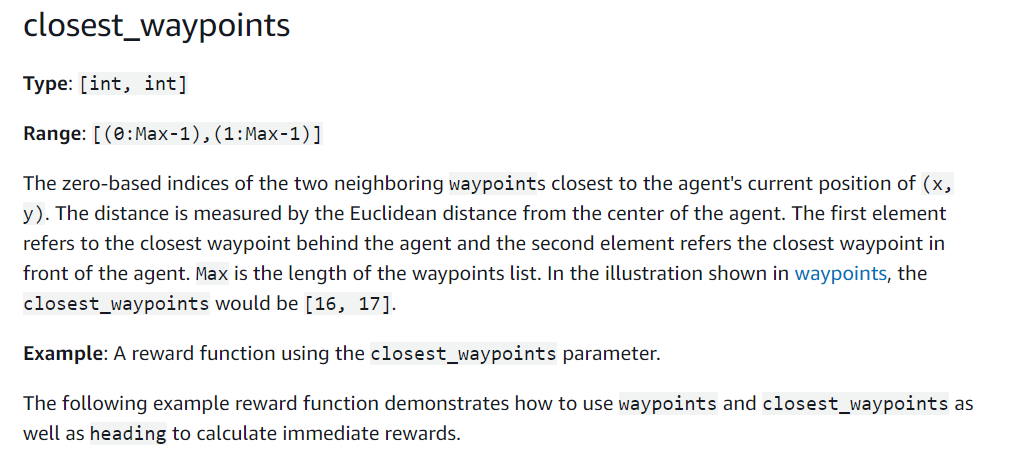